# IMDB数据集的正则化实现方式
本文通过IMDB数据集（根据评论分类出是好评还是差评的电影评论数据集）的例子简要介绍几个Keras正则化，从而减少过拟合的影响。

这几种方式分别是
- 1.减少网络大小
- 2.添加L2正则化
- 3.添加dropout

以及最后也调加了一个L2 + dropout的组合使用来比较模型

In [1]:
# 导入数据集集必要的库
from keras.datasets import imdb
import numpy as np

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [3]:
# 看下数据集的shape
print(train_data.shape, test_data.shape)

(25000,) (25000,)


In [4]:
# 将数据集模型向量化函数
def vectorize_sequences(sequences, dimention=10000):
    results = np.zeros((len(sequences), dimention))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [5]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [6]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [7]:
# 划分数据集合训练集
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [8]:
from keras import models
from keras import layers

In [9]:
# 定义一个最原始的模型
def origin_model():
    model = models.Sequential()
    model.add(layers.Dense(16, activation='relu', input_shape = (x_val.shape[1], )))
    model.add(layers.Dense(16, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
    return model

In [10]:
# 开始训练
his_origin = origin_model().fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 207us/step - loss: 0.5084 - acc: 0.7813 - val_loss: 0.3797 - val_acc: 0.8684
Epoch 2/20
15000/15000 [==============================] - 2s 113us/step - loss: 0.3004 - acc: 0.9047 - val_loss: 0.3004 - val_acc: 0.8897
Epoch 3/20
15000/15000 [==============================] - 2s 114us/step - loss: 0.2179 - acc: 0.9285 - val_loss: 0.3085 - val_acc: 0.8711
Epoch 4/20
15000/15000 [==============================] - 2s 117us/step - loss: 0.1750 - acc: 0.9437 - val_loss: 0.2840 - val_acc: 0.8832
Epoch 5/20
15000/15000 [==============================] - 2s 113us/step - loss: 0.1427 - acc: 0.9543 - val_loss: 0.2841 - val_acc: 0.8872
Epoch 6/20
15000/15000 [==============================] - 2s 114us/step - loss: 0.1150 - acc: 0.9650 - val_loss: 0.3166 - val_acc: 0.8772
Epoch 7/20
15000/15000 [==============================] - 2s 111us/step - loss: 0.0980 - acc: 0.9705 - val_loss: 0.3127 - 

In [11]:
# 获取下训练中的数据
his_origin_dict = his_origin.history
print(his_origin_dict.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


In [12]:
# 定义一个小一点的模型
def small_model():
    model = models.Sequential()
    model.add(layers.Dense(4, activation='relu', input_shape = (x_val.shape[1], )))
    model.add(layers.Dense(4, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
    return model

In [13]:
# 定义一个大一点的模型
def big_model():
    model = models.Sequential()
    model.add(layers.Dense(512, activation='relu', input_shape = (x_val.shape[1], )))
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
    return model

In [14]:
# 分别开始训练
his_small = small_model().fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))
his_small_dict = his_small.history

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 128us/step - loss: 0.6050 - acc: 0.7685 - val_loss: 0.5338 - val_acc: 0.8324
Epoch 2/20
15000/15000 [==============================] - 2s 115us/step - loss: 0.4635 - acc: 0.8736 - val_loss: 0.4312 - val_acc: 0.8628
Epoch 3/20
15000/15000 [==============================] - 2s 112us/step - loss: 0.3712 - acc: 0.8937 - val_loss: 0.3685 - val_acc: 0.8749
Epoch 4/20
15000/15000 [==============================] - 2s 113us/step - loss: 0.3052 - acc: 0.9095 - val_loss: 0.3337 - val_acc: 0.8755
Epoch 5/20
15000/15000 [==============================] - 2s 112us/step - loss: 0.2585 - acc: 0.9204 - val_loss: 0.3015 - val_acc: 0.8869
Epoch 6/20
15000/15000 [==============================] - 2s 113us/step - loss: 0.2233 - acc: 0.9293 - val_loss: 0.2844 - val_acc: 0.8913
Epoch 7/20
15000/15000 [==============================] - 2s 112us/step - loss: 0.1961 - acc: 0.9375 - val_loss: 0.2792 - 

In [15]:
his_big = big_model().fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))
his_big_dict = his_big.history

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 168us/step - loss: 0.5363 - acc: 0.7761 - val_loss: 0.2944 - val_acc: 0.8824
Epoch 2/20
15000/15000 [==============================] - 2s 132us/step - loss: 0.2591 - acc: 0.9010 - val_loss: 0.4881 - val_acc: 0.8058
Epoch 3/20
15000/15000 [==============================] - 2s 130us/step - loss: 0.1536 - acc: 0.9425 - val_loss: 0.3603 - val_acc: 0.8422
Epoch 4/20
15000/15000 [==============================] - 2s 136us/step - loss: 0.0735 - acc: 0.9739 - val_loss: 0.4101 - val_acc: 0.8787
Epoch 5/20
15000/15000 [==============================] - 2s 132us/step - loss: 0.1243 - acc: 0.9772 - val_loss: 0.3255 - val_acc: 0.8885
Epoch 6/20
15000/15000 [==============================] - 2s 140us/step - loss: 0.0047 - acc: 0.9995 - val_loss: 0.4786 - val_acc: 0.8872
Epoch 7/20
15000/15000 [==============================] - 2s 129us/step - loss: 6.2986e-04 - acc: 0.9999 - val_loss: 0.573

In [16]:
import matplotlib.pyplot as plt

In [17]:
# 对比下几个模型的参数
origin_validation_loss_value = his_origin_dict['val_loss']
small_validation_loss_value = his_small_dict['val_loss']
big_validation_loss_value = his_big_dict['val_loss']
Epochs = range(1, len(origin_validation_loss_value) + 1)

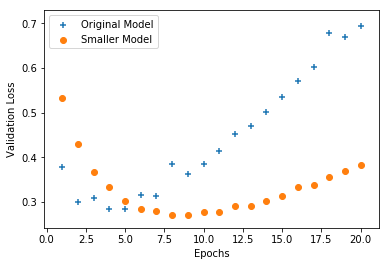

In [18]:
# 验证集损失率对比
plt.scatter(Epochs, origin_validation_loss_value, marker='+', label='Original Model')
plt.scatter(Epochs, small_validation_loss_value, marker='o', label='Smaller Model')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.show()

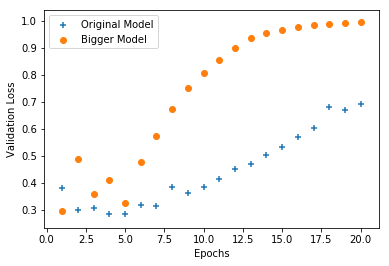

In [19]:
# 验证集损失率对比
plt.scatter(Epochs, origin_validation_loss_value, marker='+', label='Original Model')
plt.scatter(Epochs, big_validation_loss_value, marker='o', label='Bigger Model')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.show()

In [20]:
origin_loss_value = his_origin_dict['loss']
small_loss_value = his_small_dict['loss']
big_loss_value = his_big_dict['loss']

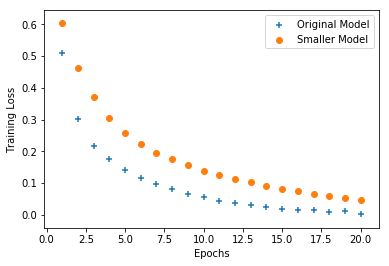

In [21]:
# 训练集损失率对比
plt.scatter(Epochs, origin_loss_value, marker='+', label='Original Model')
plt.scatter(Epochs, small_loss_value, marker='o', label='Smaller Model')
plt.xlabel('Epochs')
plt.ylabel('Training Loss')
plt.legend()
plt.show()

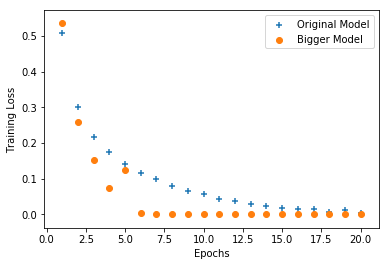

In [22]:
# 训练集损失率对比
plt.scatter(Epochs, origin_loss_value, marker='+', label='Original Model')
plt.scatter(Epochs, big_loss_value, marker='o', label='Bigger Model')
plt.xlabel('Epochs')
plt.ylabel('Training Loss')
plt.legend()
plt.show()

由上面可以看出大点模型确实在训练集上的损失是越来越小的，但是验证集却越来越大，说明在大的模型下，程序容易过拟合，所以**减少一定的网络结构可以防止过拟合**

In [23]:
from keras import regularizers

In [24]:
# L2权重正则化
def L2_model():
    model = models.Sequential()
    model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001), activation='relu', input_shape=(x_val.shape[1], )))
    model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
    return model

In [25]:
# L2正则化开始训练
his_L2 = L2_model().fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))
his_L2_dict = his_L2.history

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 142us/step - loss: 0.5700 - acc: 0.7876 - val_loss: 0.4846 - val_acc: 0.8243
Epoch 2/20
15000/15000 [==============================] - 2s 112us/step - loss: 0.3755 - acc: 0.8954 - val_loss: 0.3678 - val_acc: 0.8756
Epoch 3/20
15000/15000 [==============================] - 2s 113us/step - loss: 0.2948 - acc: 0.9184 - val_loss: 0.3354 - val_acc: 0.8882
Epoch 4/20
15000/15000 [==============================] - 2s 112us/step - loss: 0.2553 - acc: 0.9304 - val_loss: 0.3374 - val_acc: 0.8826
Epoch 5/20
15000/15000 [==============================] - 2s 113us/step - loss: 0.2337 - acc: 0.9399 - val_loss: 0.3418 - val_acc: 0.8823
Epoch 6/20
15000/15000 [==============================] - 2s 119us/step - loss: 0.2180 - acc: 0.9466 - val_loss: 0.3330 - val_acc: 0.8848
Epoch 7/20
15000/15000 [==============================] - 2s 118us/step - loss: 0.2031 - acc: 0.9526 - val_loss: 0.3396 - 

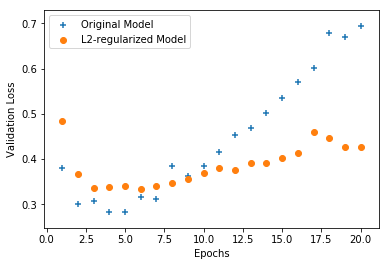

In [26]:
# 绘制L2正则化曲线
L2_validation_loss_value = his_L2_dict['val_loss']
plt.scatter(Epochs, origin_validation_loss_value, marker='+', label='Original Model')
plt.scatter(Epochs, L2_validation_loss_value, marker='o', label='L2-regularized Model')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.show()

由上面可以看出调加了L2正则化的散点图的loss是比较稳定的，所以**调加一定的L2正则化可以防止过拟合**

In [27]:
# Dropout正则化
def Dropout_model():
    model = models.Sequential()
    model.add(layers.Dense(16, activation='relu', input_shape=(x_val.shape[1], )))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(16, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
    return model

In [28]:
# 开始训练
his_dropout = Dropout_model().fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))
his_dropout_dict = his_dropout.history

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 142us/step - loss: 0.6383 - acc: 0.6236 - val_loss: 0.5497 - val_acc: 0.8381
Epoch 2/20
15000/15000 [==============================] - 2s 120us/step - loss: 0.5392 - acc: 0.7463 - val_loss: 0.4584 - val_acc: 0.8383
Epoch 3/20
15000/15000 [==============================] - 2s 119us/step - loss: 0.4616 - acc: 0.8129 - val_loss: 0.4049 - val_acc: 0.8526
Epoch 4/20
15000/15000 [==============================] - 2s 114us/step - loss: 0.4007 - acc: 0.8477 - val_loss: 0.3372 - val_acc: 0.8834
Epoch 5/20
15000/15000 [==============================] - 2s 118us/step - loss: 0.3480 - acc: 0.8749 - val_loss: 0.3140 - val_acc: 0.8842
Epoch 6/20
15000/15000 [==============================] - 2s 117us/step - loss: 0.3063 - acc: 0.8989 - val_loss: 0.3048 - val_acc: 0.8868
Epoch 7/20
15000/15000 [==============================] - 2s 116us/step - loss: 0.2686 - acc: 0.9145 - val_loss: 0.3007 - 

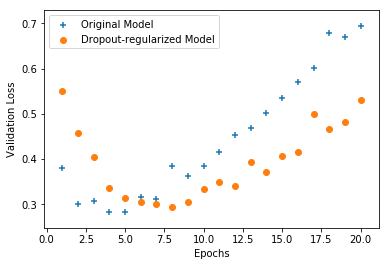

In [29]:
# 绘制Dropout正则化曲线
dropout_validation_loss_value = his_dropout_dict['val_loss']
plt.scatter(Epochs, origin_validation_loss_value, marker='+', label='Original Model')
plt.scatter(Epochs, dropout_validation_loss_value, marker='o', label='Dropout-regularized Model')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.show()

由上面可以看出调加了Dropout的散点图的loss是比原来的模型稳定，**所以调加一定的Dropout正则化可以防止过拟合**

In [30]:
# Dropout + L2正则化
def Dropout_L2_model():
    model = models.Sequential()
    model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001), activation='relu', input_shape=(x_val.shape[1], )))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
    return model

In [31]:
# 开始训练
his_dropout_l2 = Dropout_L2_model().fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))
his_dropout_l2_dict = his_dropout_l2.history

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 154us/step - loss: 0.6713 - acc: 0.6279 - val_loss: 0.5633 - val_acc: 0.8419
Epoch 2/20
15000/15000 [==============================] - 2s 116us/step - loss: 0.5581 - acc: 0.7455 - val_loss: 0.4636 - val_acc: 0.8599
Epoch 3/20
15000/15000 [==============================] - 2s 118us/step - loss: 0.4769 - acc: 0.8097 - val_loss: 0.3932 - val_acc: 0.8773
Epoch 4/20
15000/15000 [==============================] - 2s 115us/step - loss: 0.4163 - acc: 0.8527 - val_loss: 0.3493 - val_acc: 0.8834
Epoch 5/20
15000/15000 [==============================] - 2s 114us/step - loss: 0.3694 - acc: 0.8815 - val_loss: 0.3324 - val_acc: 0.8857
Epoch 6/20
15000/15000 [==============================] - 2s 117us/step - loss: 0.3381 - acc: 0.8983 - val_loss: 0.3598 - val_acc: 0.8742
Epoch 7/20
15000/15000 [==============================] - 2s 120us/step - loss: 0.3128 - acc: 0.9086 - val_loss: 0.3331 - 

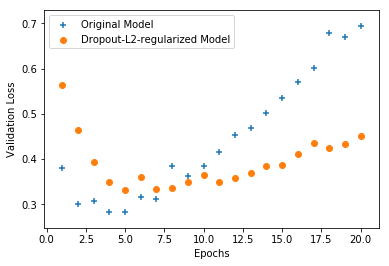

In [32]:
# 绘制Dropout + L2正则化曲线
dropout_l2_validation_loss_value = his_dropout_l2_dict['val_loss']
plt.scatter(Epochs, origin_validation_loss_value, marker='+', label='Original Model')
plt.scatter(Epochs, dropout_l2_validation_loss_value, marker='o', label='Dropout-L2-regularized Model')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.show()

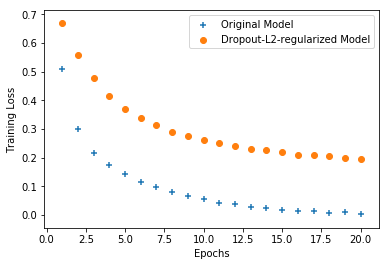

In [33]:
dropout_l2_loss_value = his_dropout_l2_dict['loss']
plt.scatter(Epochs, origin_loss_value, marker='+', label='Original Model')
plt.scatter(Epochs, dropout_l2_loss_value, marker='o', label='Dropout-L2-regularized Model')
plt.xlabel('Epochs')
plt.ylabel('Training Loss')
plt.legend()
plt.show()